# Pulsar Project

<font color=grey>__By Sheldon Kasper__</font>

#### Pulsar candidates collected during the High Time Resolution Universe Survey (South)

This project involves classifying candidates into pulsar and non-pulsar classes to aid discovery. 

Pulsars are rotating neutron stars observed to have pulses of radiation at very regular intervals that typically range from milliseconds to seconds and are of considerable scientific interest. As pulsars rotate, their emission beam sweeps across the sky. When this beam crosses a line of sight, it produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus, pulsar search involves looking for periodic radio signals with large radio telescopes. 

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. A potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional information, each candidate could potentially describe a real pulsar. However, in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning is now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. 

This dataset contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Source:
Dr Robert Lyon, University of Manchester, School of Physics and Astronomy, Alan Turing Building, Manchester M13 9PL, United Kingdom

[HTRU2 Data Set from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/HTRU2)

### Objective

To explore the HTRU2 dataset and determine ways to classify candidates into pulsar and non-pulsar classes. Various classification models will be built with the goal being to find the best model that classifies the candidates.

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot.keras import PlotLossesCallback
import pickle

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Exploratory Data Analysis

### Import the Data

The raw data does not have column headers so these have to be added as per the documentation.

In [2]:
HTRU2 = pd.read_csv('HTRU_2.csv', 
                   names = ["Mean of the Integrated Profile", 
                            "Standard Deviation of the Integrated Profile", 
                            "Excess Kurtosis of the Integrated Profile", 
                            "Skewness of the Integrated Profile", 
                            "Mean of the DM-SNR Curve", 
                            "Standard Deviation of the DM-SNR Curve", 
                            "Excess Kurtosis of the DM-SNR Curve", 
                            "Skewness of the DM-SNR Curve", 
                            "Class"])

### Explore and Visualize the Data

To get a sense of what the data looks like, the first five rows are printed out.

In [3]:
HTRU2.head()

,Mean of the Integrated Profile,Standard Deviation of the Integrated Profile,Excess Kurtosis of the Integrated Profile,Skewness of the Integrated Profile,Mean of the DM-SNR Curve,Standard Deviation of the DM-SNR Curve,Excess Kurtosis of the DM-SNR Curve,Skewness of the DM-SNR Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


There are eight feature columns (Mean of the Integrated Profile, Standard Deviation of the Integrated Profile, Excess Kurtosis of the Integrated Profile, Skewness of the Integrated Profile, Mean of the DM-SNR Curve, Standard Deviation of the DM-SNR Curve, Excess Kurtosis of the DM-SNR Curve, Skewness of the DM-SNR Curve) and one target column (Class).

Gather more information about the data including number of entries and type.

In [4]:
HTRU2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Mean of the Integrated Profile                  17898 non-null float64
Standard Deviation of the Integrated Profile    17898 non-null float64
Excess Kurtosis of the Integrated Profile       17898 non-null float64
Skewness of the Integrated Profile              17898 non-null float64
Mean of the DM-SNR Curve                        17898 non-null float64
Standard Deviation of the DM-SNR Curve          17898 non-null float64
Excess Kurtosis of the DM-SNR Curve             17898 non-null float64
Skewness of the DM-SNR Curve                    17898 non-null float64
Class                                           17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


There are 17,898 data points and no null values.

The eight features are continuous, while the target is categorical.

Check for any duplicate rows and print out the duplicates.

In [5]:
duplicateRowsDF = HTRU2[HTRU2.duplicated()]
print("Duplicate rows except first occurrence based on all columns are:")
print(duplicateRowsDF)

Duplicate rows except first occurrence based on all columns are:
Empty DataFrame
Columns: [Mean of the Integrated Profile, Standard Deviation of the Integrated Profile, Excess Kurtosis of the Integrated Profile, Skewness of the Integrated Profile, Mean of the DM-SNR Curve, Standard Deviation of the DM-SNR Curve, Excess Kurtosis of the DM-SNR Curve, Skewness of the DM-SNR Curve, Class]
Index: []


No duplicate rows were detected.

Some statistics on the data entries in each column.

In [6]:
np.round(HTRU2.describe())

,Mean of the Integrated Profile,Standard Deviation of the Integrated Profile,Excess Kurtosis of the Integrated Profile,Skewness of the Integrated Profile,Mean of the DM-SNR Curve,Standard Deviation of the DM-SNR Curve,Excess Kurtosis of the DM-SNR Curve,Skewness of the DM-SNR Curve,Class
count,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0
mean,111.0,47.0,0.0,2.0,13.0,26.0,8.0,105.0,0.0
std,26.0,7.0,1.0,6.0,29.0,19.0,5.0,107.0,0.0
min,6.0,25.0,-2.0,-2.0,0.0,7.0,-3.0,-2.0,0.0
25%,101.0,42.0,0.0,-0.0,2.0,14.0,6.0,35.0,0.0
50%,115.0,47.0,0.0,0.0,3.0,18.0,8.0,83.0,0.0
75%,127.0,51.0,0.0,1.0,5.0,28.0,11.0,139.0,0.0
max,193.0,99.0,8.0,68.0,223.0,111.0,35.0,1191.0,1.0


Create a list of features and target.

In [7]:
feat = list(HTRU2)

Histograms of the various features and target.

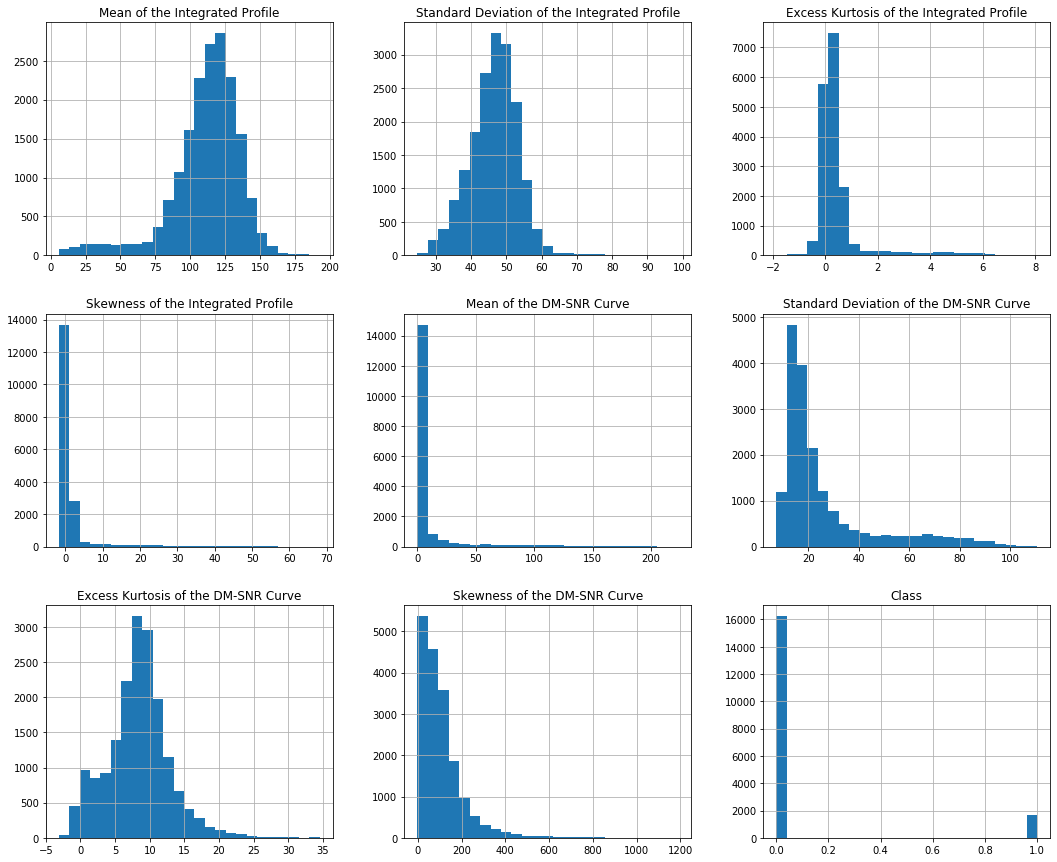

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25, wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    HTRU2[i].hist(bins=25, figsize=(18,15), xlabelsize='10', ylabelsize='10', ax=ax)
    ax.set_title(i)

for ax in axes_list:
    ax.remove()

To get a better idea of the data distribution, a pair plot will be created between all of the features. The colors represent the non-pulsar and pulsar classes.

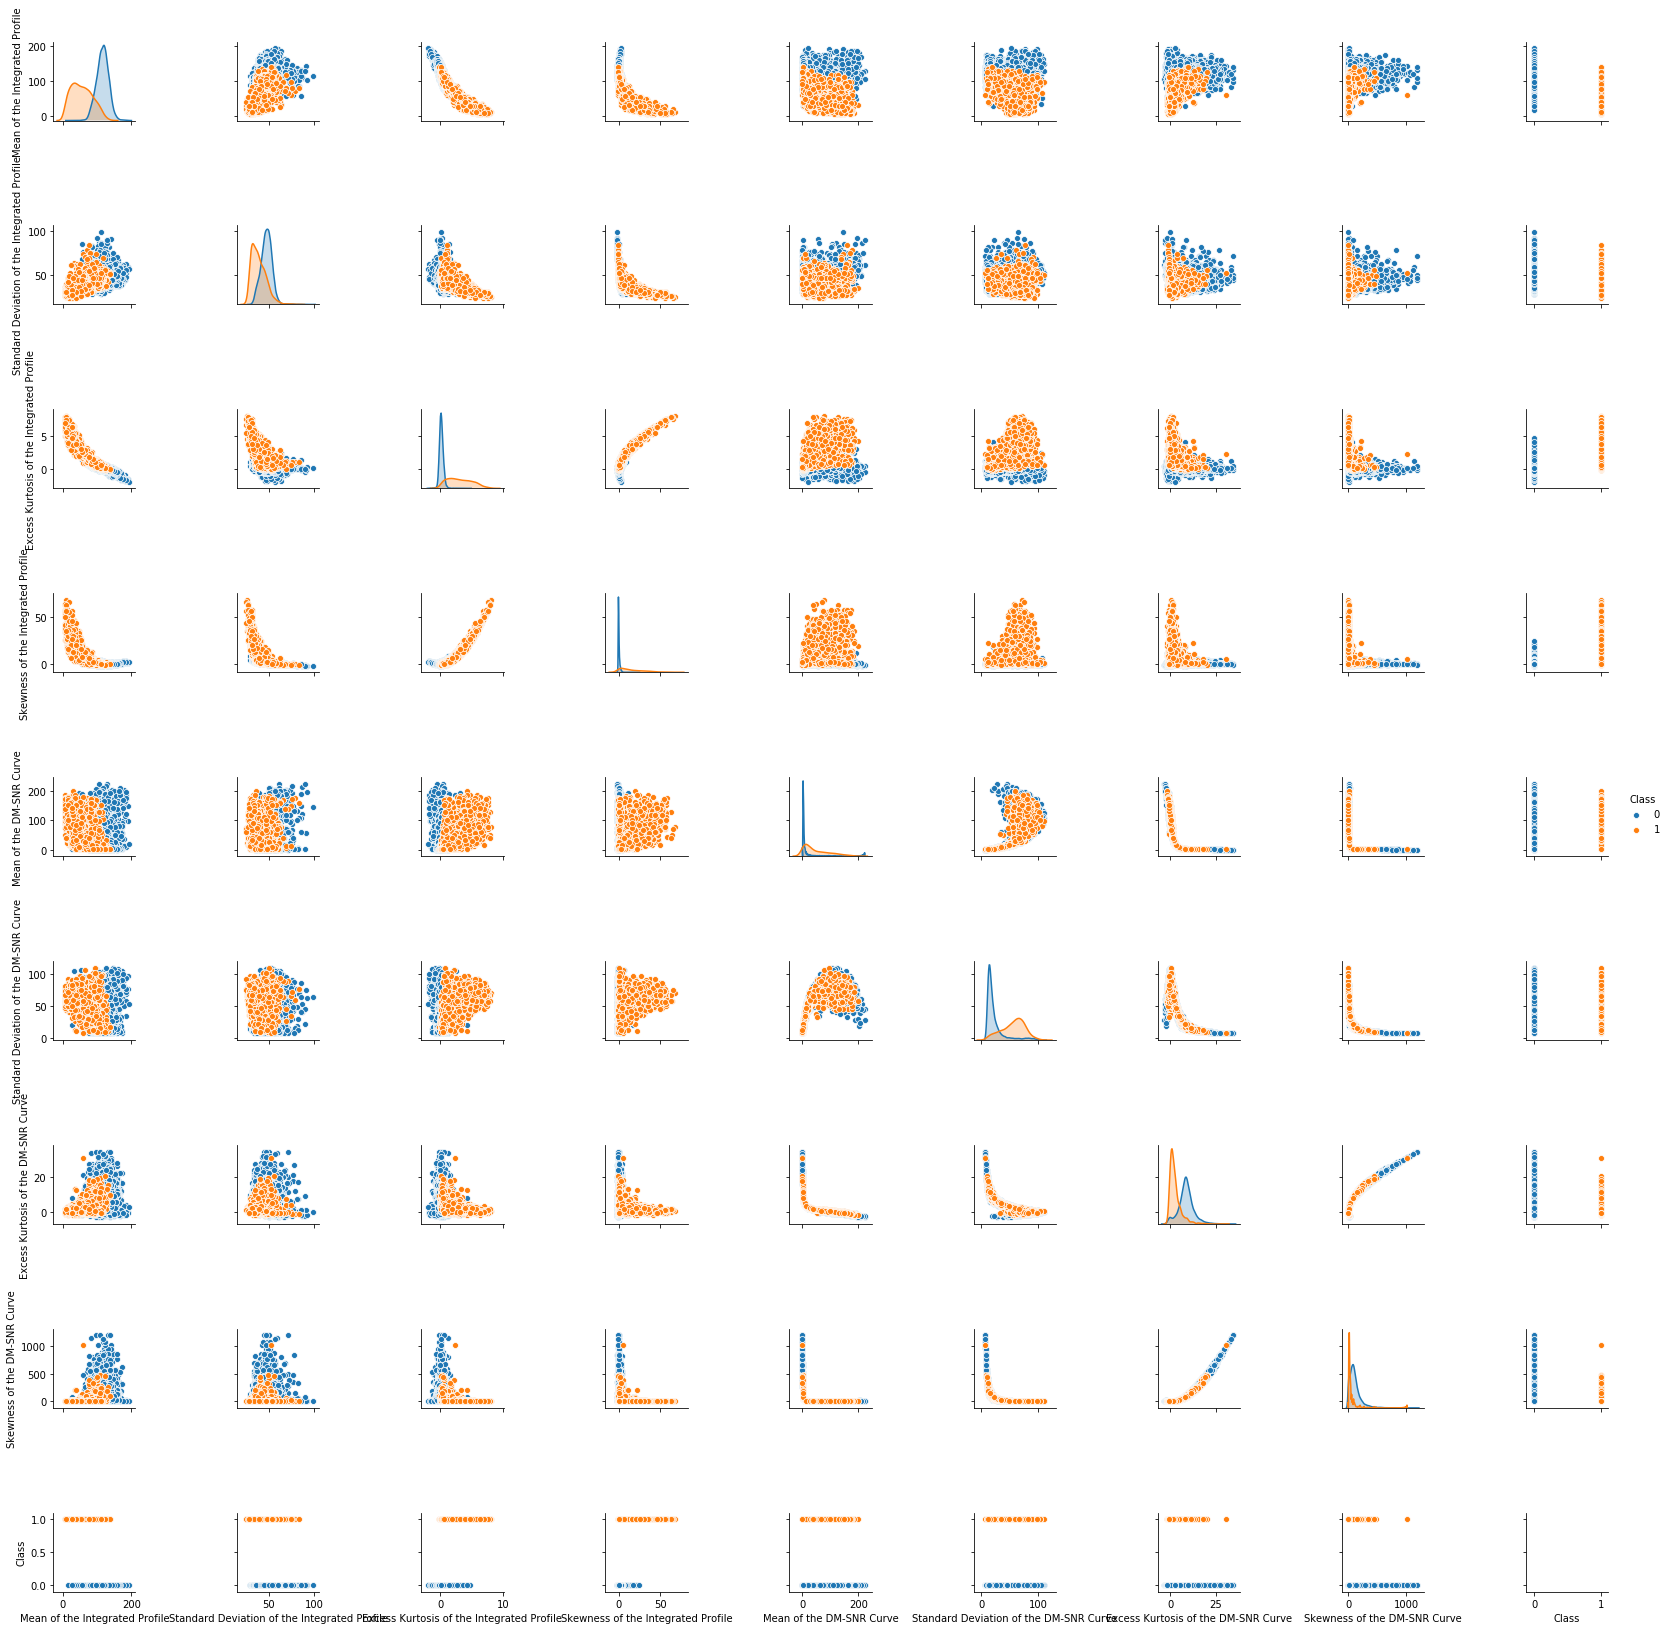

In [9]:
sns.pairplot(HTRU2, hue='Class')

For the most part, the two classes separate out quite well.

Correlation of the features versus Class.

In [10]:
HTRU2.corr()['Class'].sort_values(ascending=False)

Class                                           1.000000
Excess Kurtosis of the Integrated Profile       0.791591
Skewness of the Integrated Profile              0.709528
Standard Deviation of the DM-SNR Curve          0.491535
Mean of the DM-SNR Curve                        0.400876
Skewness of the DM-SNR Curve                   -0.259117
Standard Deviation of the Integrated Profile   -0.363708
Excess Kurtosis of the DM-SNR Curve            -0.390816
Mean of the Integrated Profile                 -0.673181
Name: Class, dtype: float64

A plot of the correlations.

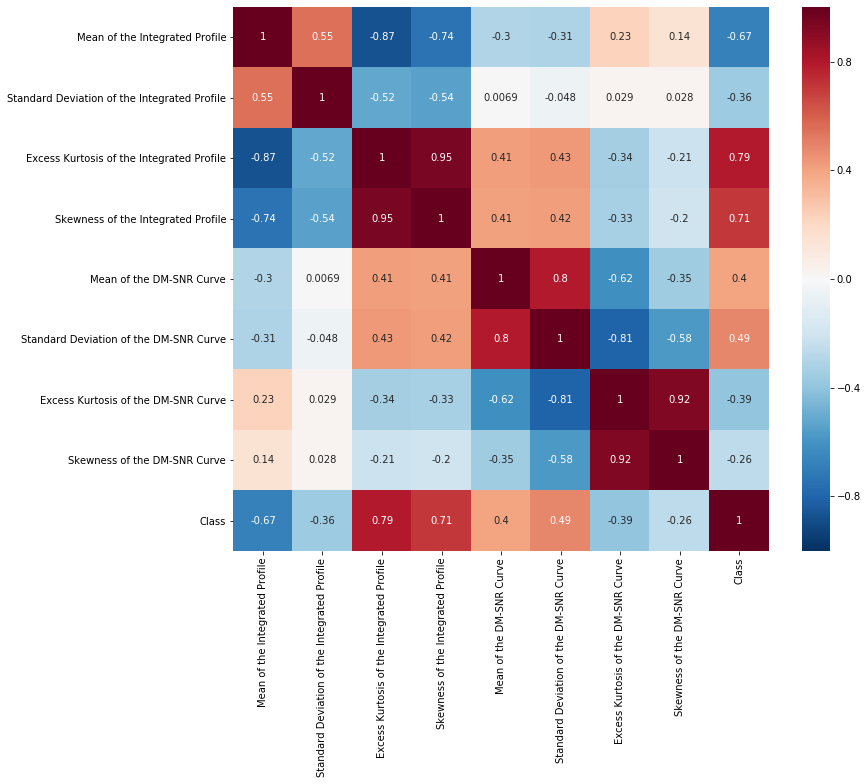

In [11]:
correlation = HTRU2.corr()
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

For the next plots, Class will be removed from the features list and plotted against.

In [12]:
feat.remove('Class')
feat

['Mean of the Integrated Profile',
 'Standard Deviation of the Integrated Profile',
 'Excess Kurtosis of the Integrated Profile',
 'Skewness of the Integrated Profile',
 'Mean of the DM-SNR Curve',
 'Standard Deviation of the DM-SNR Curve',
 'Excess Kurtosis of the DM-SNR Curve',
 'Skewness of the DM-SNR Curve']

A bar plot of Class for each of the eight features.

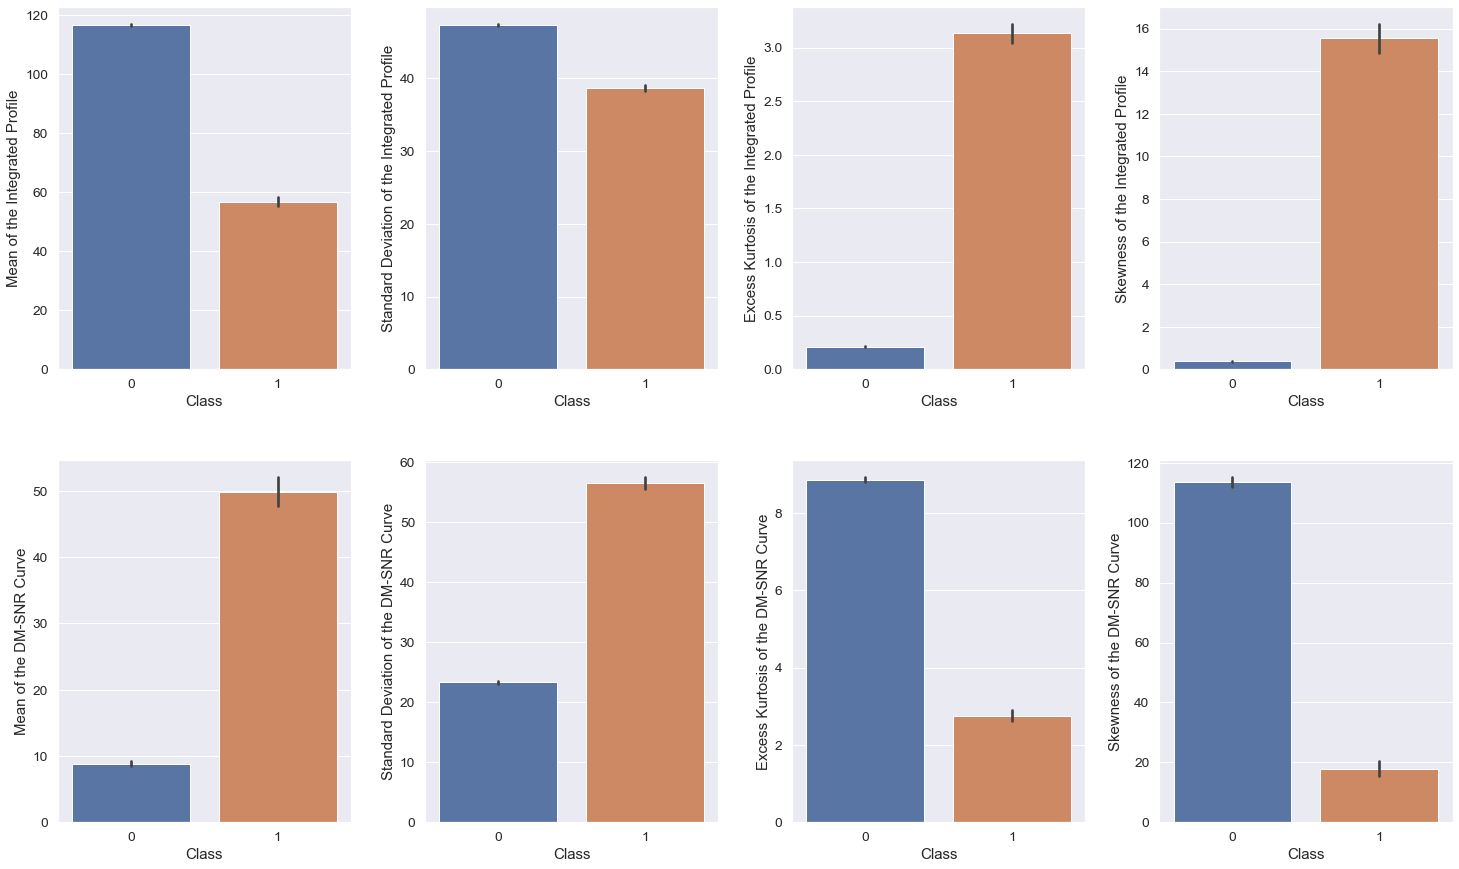

In [13]:
sns.set(font_scale=1.25)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25, wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    sns.barplot(x = 'Class', y = i, data = HTRU2, ax=ax)

for ax in axes_list:
    ax.remove()

A box plot of Class for each of the eight features.

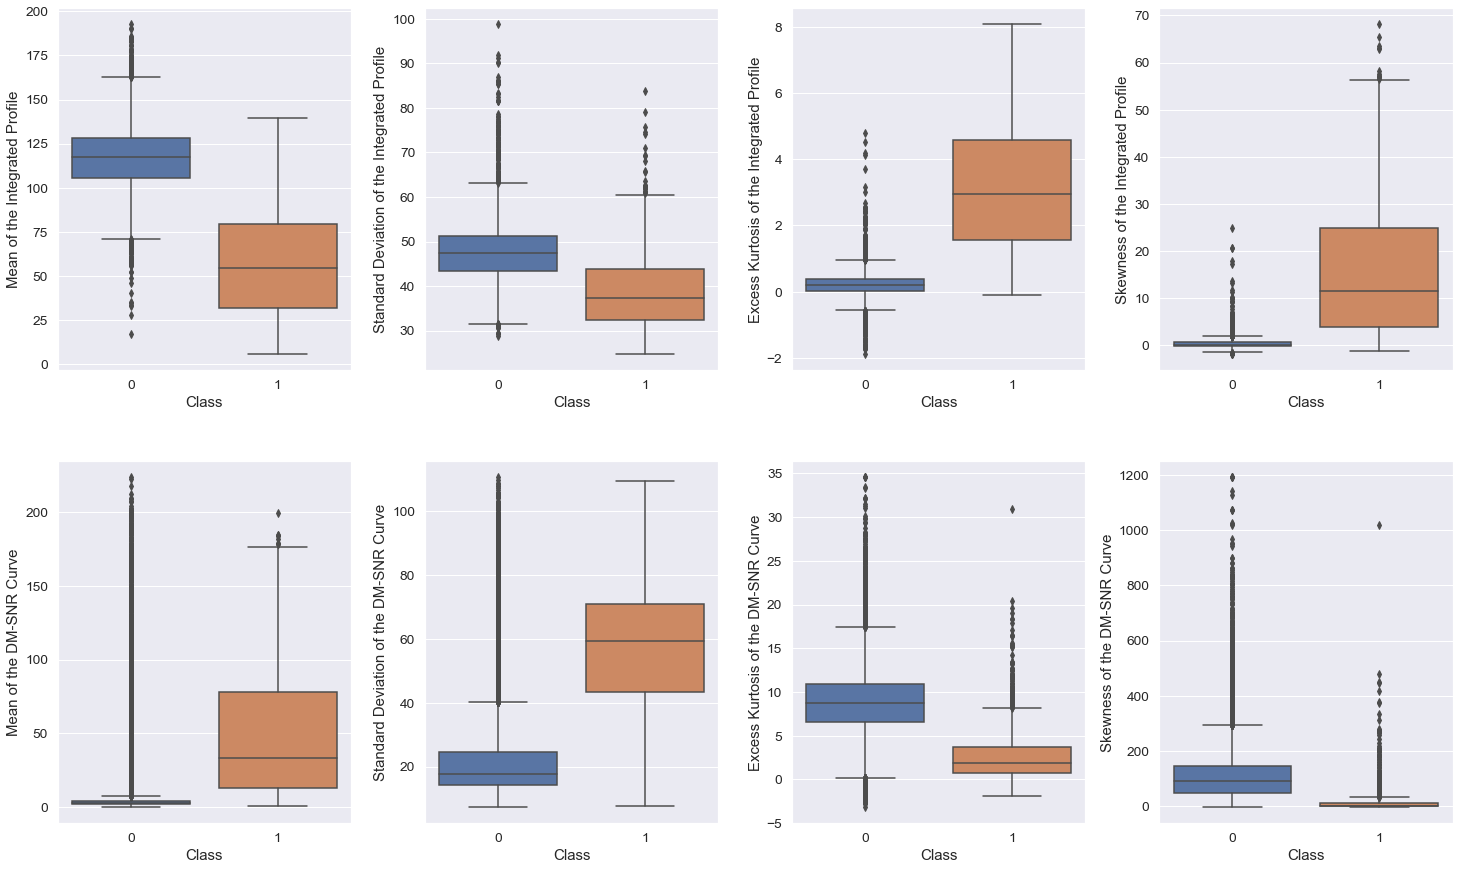

In [14]:
sns.set(font_scale=1.25)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25, wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    sns.boxplot(x = 'Class', y = i, data = HTRU2, ax=ax)

for ax in axes_list:
    ax.remove()

Overall, the data seems fairly well behaved. There are no null entries or duplicate rows. There are some outliers but none seem too extreme.

The data appears to be quite clean and is ready to be modelled.

## Models

There are a number of machine learning models that can be used for this project. Since this is a binary classification problem, the following models will be built:
 - Logistic Regression
 - K-Nearest Neighbors (KNN)
 - Support Vector Machine (SVM)
 - Decision Tree
 - Random Forest
 - Extra Trees
 - AdaBoost
 - Gradient Boosting
 - Gaussian Naive Bayes
 - Bernoulli Naive Bayes
 - Stochastic Gradient Descent
 - XGBoost

In addition, a few artificial neural networks will also be built.

Using Scikit-learn:
 - Multilayer Perceptron (MLP)

Using Keras:
 - MLP with 1 Hidden Layer
 - MLP with 2 Hidden Layers
 - MLP with 3 Hidden Layers
 - MLP with 1 Hidden Layer and 1 Dropout Layer
 - MLP with 2 Hidden Layers and 1 Dropout Layer

Due to time and computing restraints, full model optimization by tuning all hyperparameters is not possible. Instead, where applicable, a few top hyperparameters will be tuned before building the final model. Some tuning will be done separately in steps to allow quicker results. Ideally, everything would tune together, but this quickly results in excessive amounts of model cases to be tested.

### Model Preparation

Separate the data into the features (x) and target (y).

In [15]:
x = HTRU2.drop(['Class'], axis=1)
y = HTRU2['Class']

Split the data into training and test sets. For these models, 80% of the data will be used for training and 20% will be used for final testing.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

Scale the data. Note that it is fit and transformed only to the training set. The test set is only transformed.

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Some models will have their hyperparameters tuned before building the final model. This will be done with the assistance of GridSearchCV. For these runs, a scaled fit will be made with all of the data as it will all be used to train the model at some point during cross-validation.

In [18]:
xall = scaler.fit_transform(x)
yall = y

### Model Evaluation

There are a number of metrics that will be used to evaluate the performance of the final models.

The confusion matrix is quite useful in evaluating a classification model. An example is shown below.

<img style="float: left;height:215px; width:400px" src="ConfusionMatrix.png">
<br>
<br>
<br>
<br>
True Negative (TN) - The cases where it is actually negative and the model predicts negative.

False Positive (FP) - The cases where it is actually negative but the model predicts positive.

False Negative (FN) - The cases where it is actually positive but the model predicts negative.

True Positive (TP) - The cases where it is actually positive and the model predicts positive.

Other evaluation metrics can be calculated from the confusion matrix:
- Accuracy - Ratio of correct predictions over total predictions   <font color=blue>__(TP+TN)/(TP+TN+FP+FN)__</font>
- Precision - Expresses the proportion of the data points the model says was relevant actually were relevant   <font color=blue>__TP/(TP+FP)__</font>
- Recall - Expresses the ability to find all relevant instances in a dataset   <font color=blue>__TP/(TP+FN)__</font>
- F1 Score - The harmonic mean of precision and recall taking both metrics into account   <font color=blue>__2\*(precision\*recall)/(precision+recall)__</font>
- False Positive Rate - (aka Specificity) Corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points   <font color=blue>__FP/(TN+FP)__</font>

Note: In this project, negative represents the non-pulsar class and positive represents the pulsar class.


For this project, the final ranking will be based on accuracy score. As such, when model optimization is performed the models will be tuned to achieve the best accuracy score. A final model will be built using optimized hyperparameters. Other evaluation metrics of the model will be calculated including accuracy, precision, recall, F1 score, and false positive rate. A confusion matrix will also be plotted. To reduce bias, a 5-fold cross-validation will be run on the final model and the mean accuracy score will be used.

### Functions

A few functions will be defined to streamline the evaluation of the models.

This function ranks test results from optimization runs and presents the best option to use in the final model.

In [19]:
def Ranked_Test_Results(gr):
    print("Ranked Test Results")
    means = gr.cv_results_['mean_test_score']
    params = gr.cv_results_['params']
    mp = []
    for mean, param in zip(means, params):
        entry = "%f with: %s" % (mean, param)
        mp.append(entry)
    mp.sort(reverse=True)
    print(*mp, sep='\n')
    print("\nBest Option: %f using %s" % (gr.best_score_, gr.best_params_))

This function will plot the confusion matrix as an easy to read graph.

In [20]:
def Plot_Confusion_Matrix(cm):
    classes = ['Negative', 'Positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    fig = plt.figure(figsize=(4,4))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=plt.cm.cividis_r, cbar=False, annot_kws={"size":16})
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')

This function will run the model and calculate the various evaluation metrics of the model including accuracy, precision, recall, F1 score, and false positive rate. A confusion matrix will also be generated. 

It will also run the model as a 5-fold cross-validation and return the mean accuracy score of the five runs. During the 5-fold cross-validation scaling, the training data will be fit and transformed at each stage and the test data will only be transformed.

The metrics will be returned as a pandas series.

In [21]:
def Model_Eval(name, model, x_train, y_train, x_test, y_test, x, y):
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    Plot_Confusion_Matrix(cm)
    TN, FP, FN, TP = cm.ravel()
    FalsePosRate = FP / (TN + FP)
    scaler = StandardScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
    scores = cross_val_score(pipeline, x, y, cv=5, n_jobs=-1)
    print('5-Fold Cross-Validation Accuracy Scores: ', scores)
    cv_accuracy = scores.mean()
    return pd.Series([name, accuracy, precision, recall, f1score, FalsePosRate, cv_accuracy])

This function is similar to Model_Eval above but modified to work with the MLP models done with Keras. A few metrics had to be calculated slightly different when coming from a sequential model. A pipemodel was also added to allow 5-fold cross-validation.

In [22]:
def Model_Eval_K(name, model, x_train, y_train, x_test, y_test, x, y, pipemodel):
    y_pred = model.predict_classes(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    Plot_Confusion_Matrix(cm)
    TN, FP, FN, TP = cm.ravel()
    FalsePosRate = FP / (TN + FP)
    scaler = StandardScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', pipemodel)])
    scores = cross_val_score(pipeline, x, y, cv=5, n_jobs=-1)
    print('5-Fold Cross-Validation Accuracy Scores: ', scores)
    cv_accuracy = scores.mean()
    return pd.Series([name, accuracy, precision, recall, f1score, FalsePosRate, cv_accuracy])

This dataframe will hold the evaluation results from each final model run.

In [23]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 
                                'False Positive Rate', '5-Fold Cross-Validation Accuracy Score'])

### Logistic Regression Model

Logistic regression is a classification algorithm that transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to a discrete set of classes.

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97458101 0.97905028 0.98212291 0.97765363 0.97792063]


Model                                     Logistic Regression
Accuracy                                             0.979609
Precision                                            0.944251
Recall                                                0.82622
F1 Score                                             0.881301
False Positive Rate                                0.00492005
5-Fold Cross-Validation Accuracy Score               0.978266
dtype: object

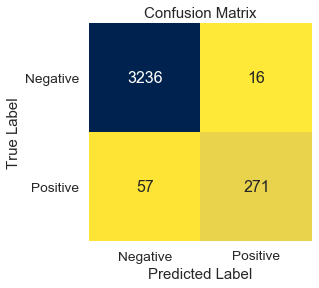

In [24]:
LRmodel = LogisticRegression(random_state=42).fit(x_train, y_train)
stats = Model_Eval('Logistic Regression', LRmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### K-Nearest Neighbors (KNN) Model

K-Nearest Neighbors is a non-parametric instance-based algorithm. Classification is computed from a simple majority vote of the k-nearest neighbours of each point.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_neighbors parameter to use in the model.

In [25]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
gr = knn_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.977819 with: {'n_neighbors': 5}
0.977707 with: {'n_neighbors': 20}
0.977595 with: {'n_neighbors': 23}
0.977595 with: {'n_neighbors': 22}
0.977595 with: {'n_neighbors': 21}
0.977539 with: {'n_neighbors': 19}
0.977539 with: {'n_neighbors': 17}
0.977484 with: {'n_neighbors': 15}
0.977428 with: {'n_neighbors': 18}
0.977428 with: {'n_neighbors': 16}
0.977428 with: {'n_neighbors': 12}
0.977372 with: {'n_neighbors': 4}
0.977316 with: {'n_neighbors': 6}
0.977316 with: {'n_neighbors': 14}
0.977316 with: {'n_neighbors': 10}
0.977204 with: {'n_neighbors': 24}
0.977204 with: {'n_neighbors': 11}
0.977092 with: {'n_neighbors': 8}
0.977092 with: {'n_neighbors': 13}
0.977037 with: {'n_neighbors': 7}
0.977037 with: {'n_neighbors': 3}
0.976981 with: {'n_neighbors': 9}
0.976701 with: {'n_neighbors': 2}
0.970332 with: {'n_neighbors': 1}

Best Option: 0.977819 using {'n_neighbors': 5}


<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97625698 0.97877095 0.98072626 0.97709497 0.97568474]


Model                                     K-Nearest Neighbors (KNN)
Accuracy                                                   0.980447
Precision                                                  0.932886
Recall                                                     0.847561
F1 Score                                                   0.888179
False Positive Rate                                      0.00615006
5-Fold Cross-Validation Accuracy Score                     0.977707
dtype: object

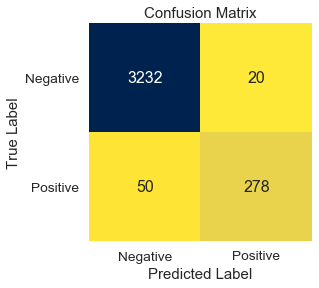

In [26]:
KNNmodel = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
stats = Model_Eval('K-Nearest Neighbors (KNN)', KNNmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Support Vector Machine (SVM) Model

Support Vector Machine is an algorithm that looks for a hyperplane that distinctly separates the data points into categories. The optimal hyperplane has the maximum distance from the nearest points of all classes.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best kernel, C, and gamma parameters to use in the model.

In [27]:
svm = SVC(max_iter=100000, random_state=42)
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
              {'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01], 'kernel': ['rbf']}]
svm_gscv = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
gr = svm_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978936 with: {'C': 100, 'kernel': 'linear'}
0.978824 with: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.978769 with: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.978713 with: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.978657 with: {'C': 10, 'kernel': 'linear'}
0.978657 with: {'C': 1, 'kernel': 'linear'}
0.978489 with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.978322 with: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.978042 with: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976254 with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.976087 with: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.975863 with: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.972679 with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.972511 with: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.960107 with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.722483 with: {'C': 1000, 'kernel': 'linear'}

Best Option: 0.978936 using {'C': 100, 'kernel': 'linear'}


<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97541899 0.98072626 0.98240223 0.9773743  0.97764114]


Model                                     Support Vector Machine (SVM)
Accuracy                                                      0.980168
Precision                                                     0.950877
Recall                                                         0.82622
F1 Score                                                      0.884176
False Positive Rate                                         0.00430504
5-Fold Cross-Validation Accuracy Score                        0.978713
dtype: object

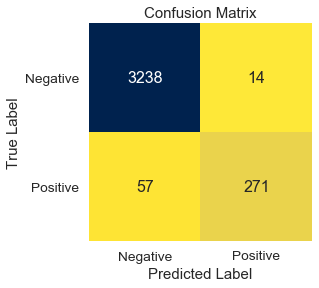

In [28]:
SVMmodel = SVC(kernel='linear', C=100, random_state=42).fit(x_train, y_train)
stats = Model_Eval('Support Vector Machine (SVM)', SVMmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Decision Tree Model

A decision tree is a tree where each node represents a feature, each link represents a decision and each leaf represents an outcome. Given data attributes together with classes, a decision tree produces a sequence of rules that can be used to classify the data.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best max_depth and min_samples_split parameters to use in the model.

In [29]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
param_grid = {'max_depth': np.arange(1,20), 
              'min_samples_split': np.arange(2,40)}
dt_gscv = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
gr = dt_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978936 with: {'max_depth': 5, 'min_samples_split': 32}
0.978936 with: {'max_depth': 5, 'min_samples_split': 31}
0.978880 with: {'max_depth': 5, 'min_samples_split': 39}
0.978880 with: {'max_depth': 5, 'min_samples_split': 38}
0.978880 with: {'max_depth': 5, 'min_samples_split': 37}
0.978880 with: {'max_depth': 5, 'min_samples_split': 36}
0.978880 with: {'max_depth': 5, 'min_samples_split': 35}
0.978880 with: {'max_depth': 5, 'min_samples_split': 30}
0.978880 with: {'max_depth': 5, 'min_samples_split': 29}
0.978880 with: {'max_depth': 5, 'min_samples_split': 28}
0.978880 with: {'max_depth': 5, 'min_samples_split': 27}
0.978880 with: {'max_depth': 5, 'min_samples_split': 26}
0.978824 with: {'max_depth': 5, 'min_samples_split': 9}
0.978824 with: {'max_depth': 5, 'min_samples_split': 8}
0.978824 with: {'max_depth': 5, 'min_samples_split': 7}
0.978824 with: {'max_depth': 5, 'min_samples_split': 6}
0.978824 with: {'max_depth': 5, 'min_samples_split': 5}
0.978824 with: {

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97709497 0.97905028 0.98044693 0.97653631 0.98155394]


Model                                     Decision Tree
Accuracy                                       0.980726
Precision                                      0.930233
Recall                                         0.853659
F1 Score                                       0.890302
False Positive Rate                          0.00645756
5-Fold Cross-Validation Accuracy Score         0.978936
dtype: object

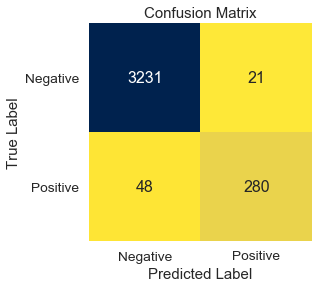

In [30]:
DTmodel = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=31, random_state=42).fit(x_train, y_train)
stats = Model_Eval('Decision Tree', DTmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Random Forest Model

Random Forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction. This works well as a large number of relatively uncorrelated trees operating as a committee will outperform any of the individual constituent trees.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best criterion parameter to use in the model.

In [31]:
rf = RandomForestClassifier(random_state=42)
param_grid = {'criterion': ['entropy', 'gini']}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gr = rf_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978098 with: {'criterion': 'entropy'}
0.977763 with: {'criterion': 'gini'}

Best Option: 0.978098 using {'criterion': 'entropy'}


Building on the previous run, an optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [32]:
rf = RandomForestClassifier(criterion='entropy', random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gr = rf_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979160 with: {'n_estimators': 99}
0.979160 with: {'n_estimators': 121}
0.979160 with: {'n_estimators': 119}
0.979104 with: {'n_estimators': 137}
0.979104 with: {'n_estimators': 101}
0.979048 with: {'n_estimators': 149}
0.979048 with: {'n_estimators': 129}
0.979048 with: {'n_estimators': 125}
0.979048 with: {'n_estimators': 123}
0.979048 with: {'n_estimators': 103}
0.978992 with: {'n_estimators': 93}
0.978992 with: {'n_estimators': 155}
0.978992 with: {'n_estimators': 131}
0.978992 with: {'n_estimators': 127}
0.978992 with: {'n_estimators': 115}
0.978992 with: {'n_estimators': 113}
0.978992 with: {'n_estimators': 109}
0.978992 with: {'n_estimators': 107}
0.978992 with: {'n_estimators': 105}
0.978936 with: {'n_estimators': 97}
0.978936 with: {'n_estimators': 95}
0.978936 with: {'n_estimators': 91}
0.978936 with: {'n_estimators': 185}
0.978936 with: {'n_estimators': 181}
0.978936 with: {'n_estimators': 153}
0.978936 with: {'n_estimators': 151}
0.978936 with: {'n_esti

Building on the previous runs, an optimization run will be done trying to find the best max_depth and min_samples_split parameters to use in the model.

In [33]:
rf = RandomForestClassifier(n_estimators=99, criterion='entropy', random_state=42)
param_grid = {'max_depth': np.arange(1,30), 
              'min_samples_split': np.arange(2,25)}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gr = rf_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979271 with: {'max_depth': 27, 'min_samples_split': 4}
0.979216 with: {'max_depth': 26, 'min_samples_split': 4}
0.979160 with: {'max_depth': 28, 'min_samples_split': 4}
0.979160 with: {'max_depth': 27, 'min_samples_split': 5}
0.979160 with: {'max_depth': 26, 'min_samples_split': 5}
0.979160 with: {'max_depth': 24, 'min_samples_split': 5}
0.979160 with: {'max_depth': 24, 'min_samples_split': 4}
0.979104 with: {'max_depth': 29, 'min_samples_split': 4}
0.979104 with: {'max_depth': 29, 'min_samples_split': 2}
0.979104 with: {'max_depth': 26, 'min_samples_split': 2}
0.979104 with: {'max_depth': 23, 'min_samples_split': 4}
0.979104 with: {'max_depth': 22, 'min_samples_split': 2}
0.979104 with: {'max_depth': 21, 'min_samples_split': 5}
0.979104 with: {'max_depth': 20, 'min_samples_split': 24}
0.979104 with: {'max_depth': 16, 'min_samples_split': 11}
0.979048 with: {'max_depth': 25, 'min_samples_split': 5}
0.979048 with: {'max_depth': 25, 'min_samples_split': 2}
0.979048 

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97709497 0.98296089 0.98212291 0.97541899 0.97875908]


Model                                     Random Forest
Accuracy                                       0.980726
Precision                                      0.919094
Recall                                         0.865854
F1 Score                                        0.89168
False Positive Rate                          0.00768758
5-Fold Cross-Validation Accuracy Score         0.979271
dtype: object

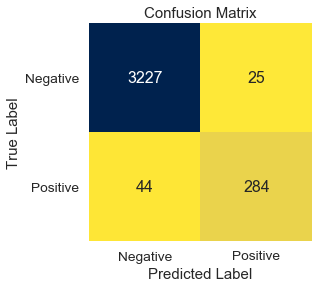

In [34]:
RFmodel = RandomForestClassifier(n_estimators=99, max_depth=27, min_samples_split=4, 
                                 criterion='entropy', random_state=42).fit(x_train, y_train)
stats = Model_Eval('Random Forest', RFmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

<font color=purple>__Feature Importance__</font>

As an added benefit to running the random forest model, the importance of each feature can be calculated for this model.

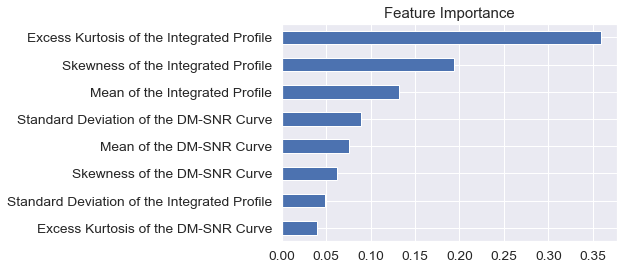

In [35]:
feat_importances = pd.Series(RFmodel.feature_importances_, index=x.columns)
feat_importances = feat_importances.sort_values()
feat_importances.plot(kind='barh', title='Feature Importance')

Clearly, Excess Kurtosis of the Integrated Profile is the most important feature influencing this model. Perhaps the model could be improved by looking at features, and even feature engineering, in more detail.

### Extra Trees Model

Extra Trees, standing for extremely randomized trees, is a variant of the random forest. Unlike a random forest, at each step the entire sample is used and decision boundaries are picked at random, rather than the best one.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [36]:
et = ExtraTreesClassifier(criterion='entropy', random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
et_gscv = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)
gr = et_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978769 with: {'n_estimators': 159}
0.978769 with: {'n_estimators': 145}
0.978713 with: {'n_estimators': 181}
0.978713 with: {'n_estimators': 157}
0.978713 with: {'n_estimators': 147}
0.978657 with: {'n_estimators': 63}
0.978657 with: {'n_estimators': 37}
0.978657 with: {'n_estimators': 25}
0.978657 with: {'n_estimators': 17}
0.978657 with: {'n_estimators': 169}
0.978657 with: {'n_estimators': 163}
0.978657 with: {'n_estimators': 155}
0.978657 with: {'n_estimators': 151}
0.978657 with: {'n_estimators': 149}
0.978657 with: {'n_estimators': 137}
0.978601 with: {'n_estimators': 187}
0.978601 with: {'n_estimators': 179}
0.978601 with: {'n_estimators': 173}
0.978601 with: {'n_estimators': 171}
0.978601 with: {'n_estimators': 165}
0.978545 with: {'n_estimators': 65}
0.978545 with: {'n_estimators': 199}
0.978545 with: {'n_estimators': 197}
0.978545 with: {'n_estimators': 189}
0.978545 with: {'n_estimators': 185}
0.978545 with: {'n_estimators': 183}
0.978545 with: {'n_esti

Building on the previous run, an optimization run will be done trying to find the best max_depth and min_samples_split parameters to use in the model.

In [37]:
et = ExtraTreesClassifier(n_estimators=145, criterion='entropy', random_state=42)
param_grid = {'max_depth': np.arange(1,30), 
              'min_samples_split': np.arange(2,25)}
et_gscv = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)
gr = et_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978880 with: {'max_depth': 26, 'min_samples_split': 2}
0.978769 with: {'max_depth': 23, 'min_samples_split': 2}
0.978769 with: {'max_depth': 21, 'min_samples_split': 5}
0.978657 with: {'max_depth': 29, 'min_samples_split': 5}
0.978657 with: {'max_depth': 29, 'min_samples_split': 4}
0.978657 with: {'max_depth': 29, 'min_samples_split': 3}
0.978601 with: {'max_depth': 28, 'min_samples_split': 6}
0.978601 with: {'max_depth': 26, 'min_samples_split': 3}
0.978545 with: {'max_depth': 29, 'min_samples_split': 9}
0.978545 with: {'max_depth': 25, 'min_samples_split': 2}
0.978545 with: {'max_depth': 22, 'min_samples_split': 2}
0.978545 with: {'max_depth': 21, 'min_samples_split': 2}
0.978489 with: {'max_depth': 27, 'min_samples_split': 7}
0.978489 with: {'max_depth': 26, 'min_samples_split': 5}
0.978489 with: {'max_depth': 25, 'min_samples_split': 9}
0.978489 with: {'max_depth': 24, 'min_samples_split': 9}
0.978489 with: {'max_depth': 22, 'min_samples_split': 3}
0.978433 wi

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.9773743  0.98184358 0.98044693 0.97709497 0.97764114]


Model                                     Extra Trees
Accuracy                                     0.980726
Precision                                    0.921824
Recall                                       0.862805
F1 Score                                     0.891339
False Positive Rate                        0.00738007
5-Fold Cross-Validation Accuracy Score        0.97888
dtype: object

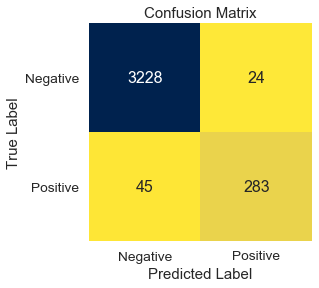

In [38]:
ETmodel = ExtraTreesClassifier(n_estimators=145, max_depth=26, min_samples_split=2, 
                               criterion='entropy', random_state=42).fit(x_train, y_train)
stats = Model_Eval('Extra Trees', ETmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### AdaBoost Model

AdaBoost, short for adaptive boosting, combines multiple weak classifiers into a single strong classifier. It works by putting more weight on difficult to classify instances and less on those already handled well.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [39]:
adab = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
adab_gscv = GridSearchCV(adab, param_grid, cv=5, n_jobs=-1)
gr = adab_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978322 with: {'n_estimators': 123}
0.978266 with: {'n_estimators': 191}
0.978266 with: {'n_estimators': 187}
0.978266 with: {'n_estimators': 113}
0.978210 with: {'n_estimators': 121}
0.978210 with: {'n_estimators': 111}
0.978154 with: {'n_estimators': 195}
0.978154 with: {'n_estimators': 185}
0.978154 with: {'n_estimators': 183}
0.978154 with: {'n_estimators': 131}
0.978154 with: {'n_estimators': 119}
0.978154 with: {'n_estimators': 117}
0.978154 with: {'n_estimators': 109}
0.978098 with: {'n_estimators': 197}
0.978098 with: {'n_estimators': 193}
0.978098 with: {'n_estimators': 181}
0.978098 with: {'n_estimators': 179}
0.978098 with: {'n_estimators': 151}
0.978098 with: {'n_estimators': 149}
0.978098 with: {'n_estimators': 145}
0.978098 with: {'n_estimators': 115}
0.978042 with: {'n_estimators': 199}
0.978042 with: {'n_estimators': 189}
0.978042 with: {'n_estimators': 177}
0.978042 with: {'n_estimators': 175}
0.978042 with: {'n_estimators': 163}
0.978042 with: {'n

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97513966 0.98072626 0.98212291 0.97653631 0.97708217]


Model                                       AdaBoost
Accuracy                                    0.980447
Precision                                   0.935811
Recall                                      0.844512
F1 Score                                    0.887821
False Positive Rate                       0.00584256
5-Fold Cross-Validation Accuracy Score      0.978321
dtype: object

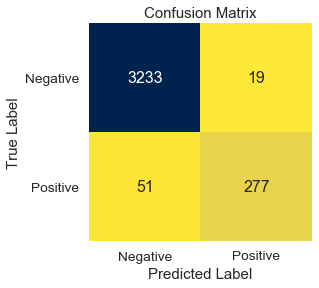

In [40]:
AdaBmodel = AdaBoostClassifier(n_estimators=123, random_state=42).fit(x_train, y_train)
stats = Model_Eval('AdaBoost', AdaBmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Gradient Boosting Model

Gradient Boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It trains many models in a gradual, additive and sequential manner.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [41]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
gb_gscv = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1)
gr = gb_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979607 with: {'n_estimators': 25}
0.979439 with: {'n_estimators': 29}
0.979439 with: {'n_estimators': 27}
0.979439 with: {'n_estimators': 23}
0.979439 with: {'n_estimators': 19}
0.979383 with: {'n_estimators': 21}
0.979271 with: {'n_estimators': 33}
0.979271 with: {'n_estimators': 31}
0.979104 with: {'n_estimators': 35}
0.979104 with: {'n_estimators': 17}
0.979048 with: {'n_estimators': 41}
0.979048 with: {'n_estimators': 37}
0.978992 with: {'n_estimators': 43}
0.978936 with: {'n_estimators': 39}
0.978880 with: {'n_estimators': 15}
0.978657 with: {'n_estimators': 47}
0.978657 with: {'n_estimators': 45}
0.978601 with: {'n_estimators': 51}
0.978545 with: {'n_estimators': 49}
0.978489 with: {'n_estimators': 53}
0.978266 with: {'n_estimators': 57}
0.978266 with: {'n_estimators': 13}
0.978210 with: {'n_estimators': 55}
0.978042 with: {'n_estimators': 67}
0.978042 with: {'n_estimators': 61}
0.978042 with: {'n_estimators': 59}
0.977986 with: {'n_estimators': 69}
0.977930

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.9773743  0.98184358 0.98044693 0.97849162 0.97987703]


Model                                     Gradient Boosting
Accuracy                                           0.979888
Precision                                          0.923841
Recall                                              0.85061
F1 Score                                           0.885714
False Positive Rate                              0.00707257
5-Fold Cross-Validation Accuracy Score             0.979607
dtype: object

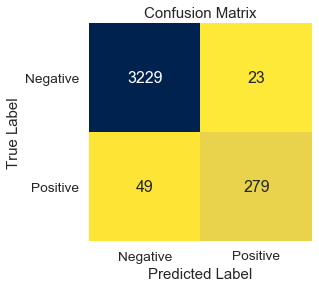

In [42]:
GBmodel = GradientBoostingClassifier(n_estimators=25, random_state=42).fit(x_train, y_train)
stats = Model_Eval('Gradient Boosting', GBmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Gaussian Naive Bayes Model

Naive Bayes is an algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Gaussian Naive Bayes assumes the attributes have a Gaussian distribution.

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.96061453 0.92374302 0.94273743 0.92849162 0.96450531]


Model                                     Gaussian Naive Bayes
Accuracy                                              0.942737
Precision                                             0.638202
Recall                                                0.865854
F1 Score                                              0.734799
False Positive Rate                                   0.049508
5-Fold Cross-Validation Accuracy Score                0.944018
dtype: object

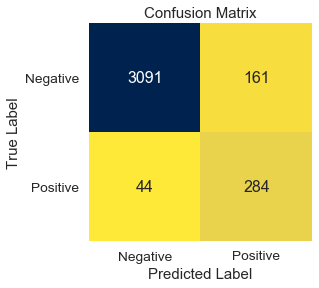

In [43]:
GNBCmodel = GaussianNB().fit(x_train, y_train)
stats = Model_Eval('Gaussian Naive Bayes', GNBCmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Bernoulli Naive Bayes Model

Bernoulli Naive Bayes implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions.

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.95307263 0.95111732 0.94469274 0.94916201 0.95612074]


Model                                     Bernoulli Naive Bayes
Accuracy                                               0.952514
Precision                                              0.687204
Recall                                                 0.884146
F1 Score                                               0.773333
False Positive Rate                                   0.0405904
5-Fold Cross-Validation Accuracy Score                 0.950833
dtype: object

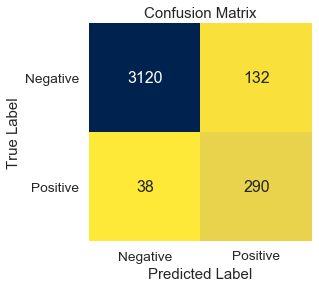

In [44]:
BNBCmodel = BernoulliNB().fit(x_train, y_train)
stats = Model_Eval('Bernoulli Naive Bayes', BNBCmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Stochastic Gradient Descent Model

Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. It is called stochastic because the method uses randomly selected samples to evaluate the gradients. It is a simple and very efficient approach to fit linear models which supports different loss functions and penalties for classification.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best alpha and penalty parameters to use in the model.

In [45]:
sgd = SGDClassifier(random_state=42)
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}
sgd_gscv = GridSearchCV(sgd, param_grid, cv=5, n_jobs=-1)
gr = sgd_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979439 with: {'alpha': 0.0001, 'penalty': 'none'}
0.979439 with: {'alpha': 0.0001, 'penalty': 'l2'}
0.978880 with: {'alpha': 0.0001, 'penalty': 'l1'}
0.978601 with: {'alpha': 0.001, 'penalty': 'l2'}
0.978489 with: {'alpha': 0.001, 'penalty': 'l1'}
0.978042 with: {'alpha': 0.001, 'penalty': 'none'}
0.977986 with: {'alpha': 0.01, 'penalty': 'none'}
0.976590 with: {'alpha': 0.1, 'penalty': 'none'}
0.974858 with: {'alpha': 0.01, 'penalty': 'l1'}
0.974802 with: {'alpha': 0.01, 'penalty': 'l2'}
0.972511 with: {'alpha': 1, 'penalty': 'none'}
0.969661 with: {'alpha': 0.1, 'penalty': 'l2'}
0.957090 with: {'alpha': 0.1, 'penalty': 'l1'}
0.949547 with: {'alpha': 1, 'penalty': 'l2'}
0.931277 with: {'alpha': 10, 'penalty': 'none'}
0.912616 with: {'alpha': 10, 'penalty': 'l2'}
0.908426 with: {'alpha': 10, 'penalty': 'l1'}
0.908426 with: {'alpha': 1, 'penalty': 'l1'}
0.862890 with: {'alpha': 100, 'penalty': 'none'}
0.745055 with: {'alpha': 100, 'penalty': 'l2'}
0.745055 with: {'

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97653631 0.97988827 0.98184358 0.97849162 0.97624371]


Model                                     Stochastic Gradient Descent
Accuracy                                                     0.979888
Precision                                                    0.941379
Recall                                                       0.832317
F1 Score                                                     0.883495
False Positive Rate                                        0.00522755
5-Fold Cross-Validation Accuracy Score                       0.978601
dtype: object

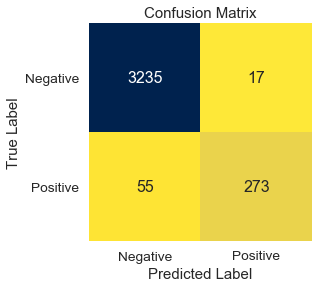

In [46]:
SGDmodel = SGDClassifier(alpha=0.0001, penalty='none', random_state=42).fit(x_train, y_train)
stats = Model_Eval('Stochastic Gradient Descent', SGDmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### XGBoost Model

XGBoost, whose name stands for eXtreme Gradient Boosting, is a decision tree based ensemble algorithm that uses a gradient boosting framework. It is designed for both speed and performance.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best max_depth and min_child_weight parameters to use in the model.

In [47]:
xgb = XGBClassifier(random_state=42)
param_grid = {'max_depth': np.arange(3,10),
              'min_child_weight': np.arange(1,6),}
xgb_gscv = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
gr = xgb_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979886 with: {'max_depth': 3, 'min_child_weight': 1}
0.979495 with: {'max_depth': 6, 'min_child_weight': 1}
0.979383 with: {'max_depth': 5, 'min_child_weight': 1}
0.979383 with: {'max_depth': 3, 'min_child_weight': 5}
0.979327 with: {'max_depth': 7, 'min_child_weight': 1}
0.979327 with: {'max_depth': 4, 'min_child_weight': 5}
0.979216 with: {'max_depth': 3, 'min_child_weight': 4}
0.979216 with: {'max_depth': 3, 'min_child_weight': 3}
0.979160 with: {'max_depth': 9, 'min_child_weight': 5}
0.979160 with: {'max_depth': 8, 'min_child_weight': 3}
0.979104 with: {'max_depth': 4, 'min_child_weight': 1}
0.979104 with: {'max_depth': 3, 'min_child_weight': 2}
0.979048 with: {'max_depth': 5, 'min_child_weight': 2}
0.978992 with: {'max_depth': 8, 'min_child_weight': 2}
0.978992 with: {'max_depth': 7, 'min_child_weight': 5}
0.978992 with: {'max_depth': 5, 'min_child_weight': 4}
0.978936 with: {'max_depth': 9, 'min_child_weight': 1}
0.978936 with: {'max_depth': 8, 'min_child_we

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97821229 0.98268156 0.98100559 0.97765363 0.97987703]


Model                                        XGBoost
Accuracy                                    0.981006
Precision                                   0.924837
Recall                                      0.862805
F1 Score                                    0.892744
False Positive Rate                       0.00707257
5-Fold Cross-Validation Accuracy Score      0.979886
dtype: object

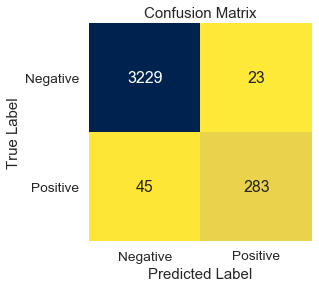

In [48]:
XGBmodel = XGBClassifier(max_depth=3, min_child_weight=1, random_state=42).fit(x_train, y_train)
stats = Model_Eval('XGBoost', XGBmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Artificial Neural Network (ANN) Models

Various multilayer perceptron models will be created using both Scikit-learn and Keras.

### <font color=navy>__Scikit-learn__</font>

### Multilayer Perceptron (MLP) Model

Multilayer Perceptron is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best hidden_layer_sizes parameter to use in the model.

In [49]:
mlp = MLPClassifier(activation='relu', solver='adam', batch_size=10, max_iter=500, random_state=42)
param_grid = {'hidden_layer_sizes': [(8,), (9,), (10,), (11,), (12,), (8,8), (11,11), (8,8,8)]}
mlp_gscv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
gr = mlp_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978992 with: {'hidden_layer_sizes': (8, 8)}
0.978992 with: {'hidden_layer_sizes': (11,)}
0.978657 with: {'hidden_layer_sizes': (12,)}
0.978545 with: {'hidden_layer_sizes': (11, 11)}
0.978489 with: {'hidden_layer_sizes': (10,)}
0.978377 with: {'hidden_layer_sizes': (9,)}
0.978210 with: {'hidden_layer_sizes': (8,)}
0.977763 with: {'hidden_layer_sizes': (8, 8, 8)}

Best Option: 0.978992 using {'hidden_layer_sizes': (11,)}


Building on the previous run, an optimization run will be done trying to find the best activation and solver parameters to use in the model.

In [50]:
mlp = MLPClassifier(hidden_layer_sizes=(11,), batch_size=10, max_iter=500, random_state=42)
param_grid = {'activation': ['relu', 'tanh'], 
              'solver': ['adam', 'sgd']}
mlp_gscv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
gr = mlp_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979551 with: {'activation': 'tanh', 'solver': 'sgd'}
0.979439 with: {'activation': 'relu', 'solver': 'sgd'}
0.978992 with: {'activation': 'relu', 'solver': 'adam'}
0.978601 with: {'activation': 'tanh', 'solver': 'adam'}

Best Option: 0.979551 using {'activation': 'tanh', 'solver': 'sgd'}


Building on the previous runs, an optimization run will be done trying to find the best batch_size parameter to use in the model.

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(11,), activation='tanh', solver='sgd', max_iter=500, random_state=42)
param_grid = {'batch_size': [10, 20, 32, 50, 100]}
mlp_gscv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
gr = mlp_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979551 with: {'batch_size': 10}
0.979048 with: {'batch_size': 20}
0.978433 with: {'batch_size': 32}
0.977986 with: {'batch_size': 50}
0.977148 with: {'batch_size': 100}

Best Option: 0.979551 using {'batch_size': 10}


<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.9773743  0.98324022 0.98100559 0.9773743  0.97959754]


Model                                     Multilayer Perceptron (MLP)
Accuracy                                                     0.981844
Precision                                                    0.931148
Recall                                                       0.865854
F1 Score                                                     0.897314
False Positive Rate                                        0.00645756
5-Fold Cross-Validation Accuracy Score                       0.979718
dtype: object

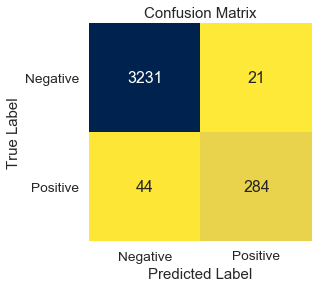

In [52]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(11,), activation='tanh', solver='sgd', batch_size=10, 
                         max_iter=500, random_state=42).fit(x_train, y_train)
stats = Model_Eval('Multilayer Perceptron (MLP)', MLPmodel, x_train, y_train, x_test, y_test, x, y)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### <font color=navy>__Keras__</font>

For the models using Keras, KerasClassifier will be utilized to allow GridSearchCV and cross-validated accuracy scores.

Due to the stochastic nature of Keras models, optimization is a bit of a challenge as the results can vary from run to run. Ideally, many runs would be conducted to find the most statistically significant parameter values to use. However, with limited resources, this is not practical. Instead, values will be chosen from the top of the ranked list based on a handful of runs.

Note: Only the final optimization run is shown. Earlier testing is not included but was considered before accepting the recommended values.

The final models will be built a little differently. Instead of using a defined epoch, early stopping will be utilized to allow the best scores. A long epoch will be used but early stopping will prevent overtraining. The log-loss and accuracy will be plotted as the model trains. A patience of 50 epochs will be employed so that the model keeps training past its optimum point to ensure that it is indeed the best model. The best model will have been saved and then loaded back into the notebook.

A 5-fold cross-validation will also be calculated for each model using a standard epoch determined from parameter tuning.

### MLP with 1 Hidden Layer Model

Multilayer perceptron model with one hidden layer.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best batch_size and epochs parameters to use in the model.

In [57]:
def create_model_s1():
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [58]:
mlpmod = KerasClassifier(build_fn=create_model_s1, verbose=0)
param_grid = {'batch_size': [10, 20, 32], 
              'epochs': [25, 50, 75, 100, 125, 150]}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.980221 with: {'batch_size': 10, 'epochs': 50}
0.979663 with: {'batch_size': 32, 'epochs': 75}
0.979663 with: {'batch_size': 20, 'epochs': 25}
0.979495 with: {'batch_size': 32, 'epochs': 50}
0.979439 with: {'batch_size': 10, 'epochs': 150}
0.979383 with: {'batch_size': 20, 'epochs': 75}
0.979327 with: {'batch_size': 32, 'epochs': 100}
0.979327 with: {'batch_size': 20, 'epochs': 100}
0.979271 with: {'batch_size': 10, 'epochs': 25}
0.979271 with: {'batch_size': 10, 'epochs': 100}
0.979216 with: {'batch_size': 32, 'epochs': 25}
0.979216 with: {'batch_size': 32, 'epochs': 150}
0.979160 with: {'batch_size': 32, 'epochs': 125}
0.979104 with: {'batch_size': 10, 'epochs': 75}
0.978992 with: {'batch_size': 20, 'epochs': 50}
0.978992 with: {'batch_size': 20, 'epochs': 150}
0.978992 with: {'batch_size': 20, 'epochs': 125}
0.978824 with: {'batch_size': 10, 'epochs': 125}

Best Option: 0.980221 using {'batch_size': 10, 'epochs': 50}


Building on the previous run, an optimization run will be done trying to find the best optimizer parameter to use in the model.

In [59]:
def create_model_s2(optimizer='Adam'):
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [60]:
mlpmod = KerasClassifier(build_fn=create_model_s2, batch_size=10, epochs=50, verbose=0)
param_grid = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979718 with: {'optimizer': 'Adam'}
0.979439 with: {'optimizer': 'Adadelta'}
0.979271 with: {'optimizer': 'Adamax'}
0.979048 with: {'optimizer': 'SGD'}
0.978992 with: {'optimizer': 'RMSprop'}
0.978936 with: {'optimizer': 'Nadam'}
0.977484 with: {'optimizer': 'Adagrad'}

Best Option: 0.979718 using {'optimizer': 'Adam'}


Building on the previous runs, an optimization run will be done trying to find the best init_mode parameter to use in the model.

In [63]:
def create_model_s3(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init_mode))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [64]:
mlpmod = KerasClassifier(build_fn=create_model_s3, batch_size=10, epochs=50, verbose=0)
param_grid = {'init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 
                            'glorot_uniform', 'he_normal', 'he_uniform']}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979551 with: {'init_mode': 'normal'}
0.979216 with: {'init_mode': 'he_normal'}
0.979160 with: {'init_mode': 'glorot_uniform'}
0.979104 with: {'init_mode': 'uniform'}
0.979104 with: {'init_mode': 'he_uniform'}
0.979048 with: {'init_mode': 'glorot_normal'}
0.978936 with: {'init_mode': 'lecun_uniform'}
0.908426 with: {'init_mode': 'zero'}

Best Option: 0.979551 using {'init_mode': 'normal'}


Building on the previous runs, an optimization run will be done trying to find the activation parameter to use in the model.

In [67]:
def create_model_s4(activation='relu'):
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation=activation, kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [68]:
mlpmod = KerasClassifier(build_fn=create_model_s4, batch_size=10, epochs=50, verbose=0)
param_grid = {'activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.980054 with: {'activation': 'softsign'}
0.980054 with: {'activation': 'sigmoid'}
0.980054 with: {'activation': 'hard_sigmoid'}
0.979663 with: {'activation': 'softplus'}
0.979383 with: {'activation': 'relu'}
0.979271 with: {'activation': 'tanh'}
0.979216 with: {'activation': 'softmax'}
0.977595 with: {'activation': 'linear'}

Best Option: 0.980054 using {'activation': 'hard_sigmoid'}


Building on the previous runs, an optimization run will be done trying to find the best neurons parameter to use in the model.

In [71]:
def create_model_s5(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [72]:
mlpmod = KerasClassifier(build_fn=create_model_s5, batch_size=10, epochs=50, verbose=0)
param_grid = {'neurons': [5, 8, 10, 15, 18, 20, 25, 30]}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.980445 with: {'neurons': 10}
0.979998 with: {'neurons': 20}
0.979998 with: {'neurons': 15}
0.979942 with: {'neurons': 18}
0.979774 with: {'neurons': 5}
0.979718 with: {'neurons': 30}
0.979663 with: {'neurons': 8}
0.979439 with: {'neurons': 25}

Best Option: 0.980445 using {'neurons': 10}


<font color=green>__Final Model__</font>

In [76]:
def create_model_1HL():
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [77]:
plot_losses_MLP1HL = PlotLossesCallback()
mc_MLP1HL = ModelCheckpoint('best_model_MLP1HL.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es_MLP1HL = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [plot_losses_MLP1HL, mc_MLP1HL, es_MLP1HL]

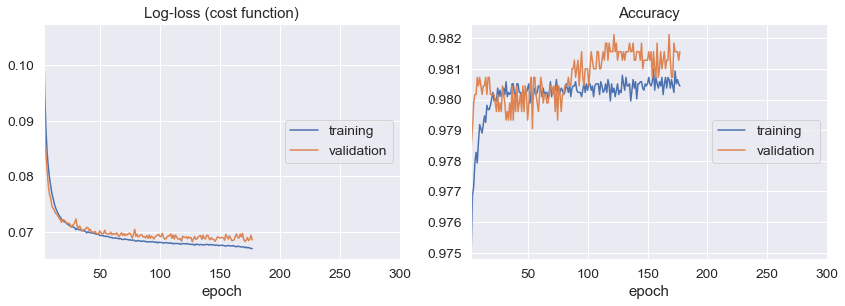

Log-loss (cost function):
training   (min:    0.067, max:    0.217, cur:    0.067)
validation (min:    0.068, max:    0.131, cur:    0.069)

Accuracy:
training   (min:    0.908, max:    0.981, cur:    0.980)
validation (min:    0.908, max:    0.982, cur:    0.982)

Epoch 00177: val_acc did not improve from 0.98212
Epoch 00177: early stopping


In [78]:
MLP1HLmodel = Sequential()
MLP1HLmodel.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
MLP1HLmodel.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
MLP1HLmodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
MLP1HLmodel.fit(x_train, y_train, batch_size=10, callbacks=callbacks_list, epochs=300, validation_data = (x_test, y_test))

In [79]:
MLP1HLmodel = load_model('best_model_MLP1HL.h5')
MLP1HLmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


5-Fold Cross-Validation Accuracy Scores:  [0.97430167 0.97905028 0.97569832 0.98155909 0.99022073]


Model                                     MLP - 1 Hidden Layer
Accuracy                                              0.982123
Precision                                             0.925806
Recall                                                   0.875
F1 Score                                              0.899687
False Positive Rate                                 0.00707257
5-Fold Cross-Validation Accuracy Score                0.980166
dtype: object

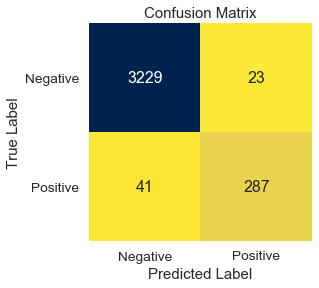

In [80]:
pipemodel = KerasClassifier(build_fn=create_model_1HL, batch_size=10, epochs=50, verbose=0)
stats = Model_Eval_K('MLP - 1 Hidden Layer', MLP1HLmodel, x_train, y_train, x_test, y_test, x, y, pipemodel)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### MLP with 2 Hidden Layers Model

Multilayer perceptron model with two hidden layers.

This model will add another hidden layer to the MLP with 1 Hidden Layer Model.

<font color=red>__Model Optimization__</font>

Building on the previous runs from the MLP with 1 Hidden Layer Model, an optimization run will be done trying to find the best neurons parameter to use in the model for the new layer.

In [81]:
def create_model_s6(neurons=1):
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
    model.add(Dense(neurons, activation='relu', kernel_initializer='normal'))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [82]:
mlpmod = KerasClassifier(build_fn=create_model_s6, batch_size=10, epochs=50, verbose=0)
param_grid = {'neurons': [1, 5, 8, 10, 15, 20, 25, 30]}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979774 with: {'neurons': 15}
0.979383 with: {'neurons': 10}
0.979327 with: {'neurons': 5}
0.979216 with: {'neurons': 8}
0.979160 with: {'neurons': 30}
0.978992 with: {'neurons': 25}
0.978936 with: {'neurons': 20}
0.922002 with: {'neurons': 1}

Best Option: 0.979774 using {'neurons': 15}


<font color=green>__Final Model__</font>

In [83]:
def create_model_2HL():
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
    model.add(Dense(15, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [84]:
plot_losses_MLP2HL = PlotLossesCallback()
mc_MLP2HL = ModelCheckpoint('best_model_MLP2HL.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es_MLP2HL = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [plot_losses_MLP2HL, mc_MLP2HL, es_MLP2HL]

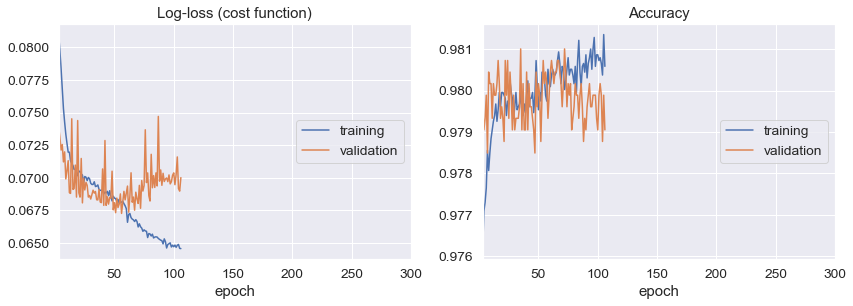

Log-loss (cost function):
training   (min:    0.065, max:    0.170, cur:    0.065)
validation (min:    0.067, max:    0.084, cur:    0.070)

Accuracy:
training   (min:    0.949, max:    0.981, cur:    0.981)
validation (min:    0.978, max:    0.981, cur:    0.979)

Epoch 00106: val_acc did not improve from 0.98101
Epoch 00106: early stopping


In [85]:
MLP2HLmodel = Sequential()
MLP2HLmodel.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
MLP2HLmodel.add(Dense(15, activation='relu', kernel_initializer='normal'))
MLP2HLmodel.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
MLP2HLmodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
MLP2HLmodel.fit(x_train, y_train, batch_size=10, callbacks=callbacks_list, epochs=300, validation_data = (x_test, y_test))

In [86]:
MLP2HLmodel = load_model('best_model_MLP2HL.h5')
MLP2HLmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_29 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 16        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


5-Fold Cross-Validation Accuracy Scores:  [0.97150838 0.97793296 0.97653631 0.98100028 0.98966192]


Model                                     MLP - 2 Hidden Layers
Accuracy                                               0.981006
Precision                                              0.933333
Recall                                                 0.853659
F1 Score                                                0.89172
False Positive Rate                                  0.00615006
5-Fold Cross-Validation Accuracy Score                 0.979328
dtype: object

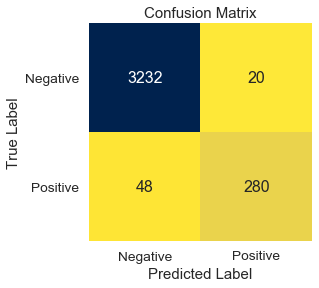

In [87]:
pipemodel = KerasClassifier(build_fn=create_model_2HL, batch_size=10, epochs=50, verbose=0)
stats = Model_Eval_K('MLP - 2 Hidden Layers', MLP2HLmodel, x_train, y_train, x_test, y_test, x, y, pipemodel)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### MLP with 3 Hidden Layers Model

Multilayer perceptron model with three hidden layers.

This model will add another hidden layer to the MLP with 2 Hidden Layers Model.

<font color=red>__Model Optimization__</font>

Building on the previous runs from the MLP with 2 Hidden Layers Model, an optimization run will be done trying to find the best neurons parameter to use in the model for the new layer.

In [88]:
def create_model_s7(neurons=1):
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
    model.add(Dense(15, activation='relu', kernel_initializer='normal'))
    model.add(Dense(neurons, activation='relu', kernel_initializer='normal'))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [89]:
mlpmod = KerasClassifier(build_fn=create_model_s7, batch_size=10, epochs=50, verbose=0)
param_grid = {'neurons': [1, 5, 8, 10, 15, 20, 25, 30]}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979886 with: {'neurons': 25}
0.979495 with: {'neurons': 10}
0.979439 with: {'neurons': 15}
0.979327 with: {'neurons': 30}
0.978042 with: {'neurons': 20}
0.960834 with: {'neurons': 8}
0.959828 with: {'neurons': 1}
0.945972 with: {'neurons': 5}

Best Option: 0.979886 using {'neurons': 25}


<font color=green>__Final Model__</font>

In [90]:
def create_model_3HL():
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
    model.add(Dense(15, activation='relu', kernel_initializer='normal'))
    model.add(Dense(25, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [91]:
plot_losses_MLP3HL = PlotLossesCallback()
mc_MLP3HL = ModelCheckpoint('best_model_MLP3HL.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es_MLP3HL = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [plot_losses_MLP3HL, mc_MLP3HL, es_MLP3HL]

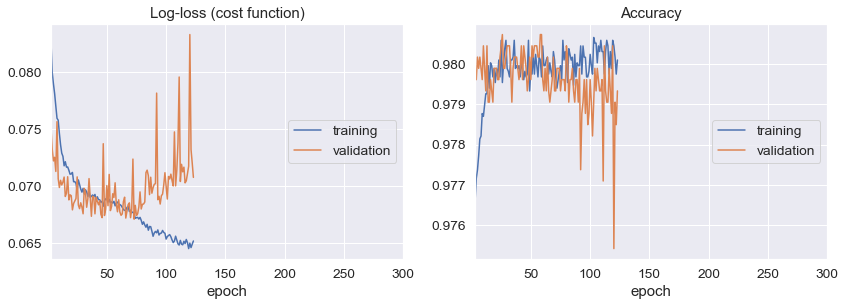

Log-loss (cost function):
training   (min:    0.064, max:    0.151, cur:    0.065)
validation (min:    0.067, max:    0.084, cur:    0.071)

Accuracy:
training   (min:    0.953, max:    0.981, cur:    0.980)
validation (min:    0.975, max:    0.981, cur:    0.979)

Epoch 00123: val_acc did not improve from 0.98073
Epoch 00123: early stopping


In [92]:
MLP3HLmodel = Sequential()
MLP3HLmodel.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal'))
MLP3HLmodel.add(Dense(15, activation='relu', kernel_initializer='normal'))
MLP3HLmodel.add(Dense(25, activation='relu', kernel_initializer='normal'))
MLP3HLmodel.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
MLP3HLmodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
MLP3HLmodel.fit(x_train, y_train, batch_size=10, callbacks=callbacks_list, epochs=300, validation_data = (x_test, y_test))

In [93]:
MLP3HLmodel = load_model('best_model_MLP3HL.h5')
MLP3HLmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_36 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_37 (Dense)             (None, 25)                400       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 26        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


5-Fold Cross-Validation Accuracy Scores:  [0.97402234 0.97821229 0.974581   0.97932383 0.98994132]


Model                                     MLP - 3 Hidden Layers
Accuracy                                               0.980726
Precision                                              0.911111
Recall                                                    0.875
F1 Score                                               0.892691
False Positive Rate                                  0.00861009
5-Fold Cross-Validation Accuracy Score                 0.979216
dtype: object

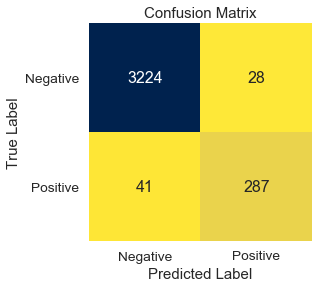

In [94]:
pipemodel = KerasClassifier(build_fn=create_model_3HL, batch_size=10, epochs=50, verbose=0)
stats = Model_Eval_K('MLP - 3 Hidden Layers', MLP3HLmodel, x_train, y_train, x_test, y_test, x, y, pipemodel)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### MLP with 1 Hidden Layer and 1 Dropout Layer Model

Multilayer perceptron model with one hidden layer and one dropout layer.

This model will add a dropout layer to the MLP with 1 Hidden Layer Model.

<font color=red>__Model Optimization__</font>

Building on the previous runs from MLP with 1 Hidden Layer Model, an optimization run will be done trying to find the best weight_constraint and dropout_rate parameters to use in the model.

In [97]:
def create_model_s8(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal', 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [98]:
mlpmod = KerasClassifier(build_fn=create_model_s8, batch_size=10, epochs=50, verbose=0)
param_grid = {'weight_constraint': [1, 2, 3, 4, 5], 
              'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Ranked Test Results
0.980277 with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.980221 with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.980110 with: {'dropout_rate': 0.2, 'weight_constraint': 5}
0.979998 with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.979886 with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.979886 with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.979830 with: {'dropout_rate': 0.2, 'weight_constraint': 3}
0.979774 with: {'dropout_rate': 0.4, 'weight_constraint': 4}
0.979718 with: {'dropout_rate': 0.3, 'weight_constraint': 5}
0.979607 with: {'dropout_rate': 0.3, 'weight_constraint': 3}
0.979607 with: {'dropout_rate': 0.2, 'weight_constraint': 4}
0.979607 with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.979551 with: {'dropout_rate': 0.3, 'weight_constraint': 4}
0.979495 with: {'dropout_rate': 0.4, 'weight_constraint': 5}
0.979495 wi

<font color=green>__Final Model__</font>

In [99]:
def create_model_1HL1DL():
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal', kernel_constraint=maxnorm(5)))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [100]:
plot_losses_MLP1HL1DL = PlotLossesCallback()
mc_MLP1HL1DL = ModelCheckpoint('best_model_MLP1HL1DL.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es_MLP1HL1DL = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [plot_losses_MLP1HL1DL, mc_MLP1HL1DL, es_MLP1HL1DL]

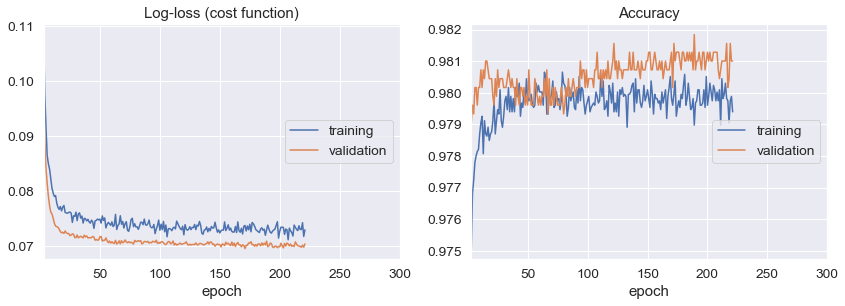

Log-loss (cost function):
training   (min:    0.071, max:    0.223, cur:    0.073)
validation (min:    0.070, max:    0.133, cur:    0.070)

Accuracy:
training   (min:    0.907, max:    0.981, cur:    0.979)
validation (min:    0.908, max:    0.982, cur:    0.981)

Epoch 00221: val_acc did not improve from 0.98184
Epoch 00221: early stopping


In [101]:
MLP1HL1DLmodel = Sequential()
MLP1HL1DLmodel.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal', 
                         kernel_constraint=maxnorm(5)))
MLP1HL1DLmodel.add(Dropout(0.1))
MLP1HL1DLmodel.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
MLP1HL1DLmodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
MLP1HL1DLmodel.fit(x_train, y_train, batch_size=10, callbacks=callbacks_list, epochs=300, validation_data = (x_test, y_test))

In [102]:
MLP1HL1DLmodel = load_model('best_model_MLP1HL1DL.h5')
MLP1HL1DLmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


5-Fold Cross-Validation Accuracy Scores:  [0.97486033 0.97960894 0.97569832 0.98016205 0.99022073]


Model                                     MLP - 1 Hidden Layer and 1 Dropout Layer
Accuracy                                                                  0.981844
Precision                                                                 0.925566
Recall                                                                    0.871951
F1 Score                                                                  0.897959
False Positive Rate                                                     0.00707257
5-Fold Cross-Validation Accuracy Score                                     0.98011
dtype: object

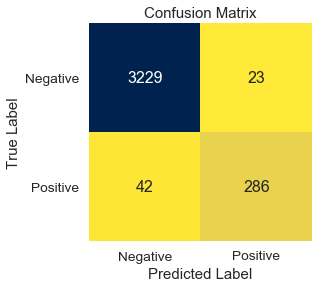

In [103]:
pipemodel = KerasClassifier(build_fn=create_model_1HL1DL, batch_size=10, epochs=50, verbose=0)
stats = Model_Eval_K('MLP - 1 Hidden Layer and 1 Dropout Layer', MLP1HL1DLmodel, x_train, y_train, x_test, y_test,
                     x, y, pipemodel)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### MLP with 2 Hidden Layers and 1 Dropout Layer Model

Multilayer perceptron model with two hidden layers and one dropout layer.

This model will add another hidden layer to the MLP with 1 Hidden Layer and 1 Dropout Layer Model.

<font color=red>__Model Optimization__</font>

Building on the previous runs from the MLP with 1 Hidden Layer and 1 Dropout Layer Model, an optimization run will be done trying to find the best neurons parameter to use in the model for the new layer.

In [108]:
def create_model_s9(neurons=1):
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal',
                    kernel_constraint=maxnorm(5)))
    model.add(Dropout(0.1))
    model.add(Dense(neurons, activation='relu', kernel_initializer='normal'))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [109]:
mlpmod = KerasClassifier(build_fn=create_model_s9, batch_size=10, epochs=50, verbose=0)
param_grid = {'neurons': [1, 5, 8, 10, 15, 20, 25, 30]}
mlpmod_gscv = GridSearchCV(estimator=mlpmod, param_grid=param_grid, cv=5, n_jobs=-1)
gr = mlpmod_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979774 with: {'neurons': 30}
0.979718 with: {'neurons': 15}
0.979607 with: {'neurons': 5}
0.979607 with: {'neurons': 20}
0.979439 with: {'neurons': 8}
0.979439 with: {'neurons': 10}
0.979327 with: {'neurons': 25}
0.979104 with: {'neurons': 1}

Best Option: 0.979774 using {'neurons': 30}


<font color=green>__Final Model__</font>

In [110]:
def create_model_2HL1DL():
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal', kernel_constraint=maxnorm(5)))
    model.add(Dropout(0.1))
    model.add(Dense(30, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [111]:
plot_losses_MLP2HL1DL = PlotLossesCallback()
mc_MLP2HL1DL = ModelCheckpoint('best_model_MLP2HL1DL.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es_MLP2HL1DL = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [plot_losses_MLP2HL1DL, mc_MLP2HL1DL, es_MLP2HL1DL]

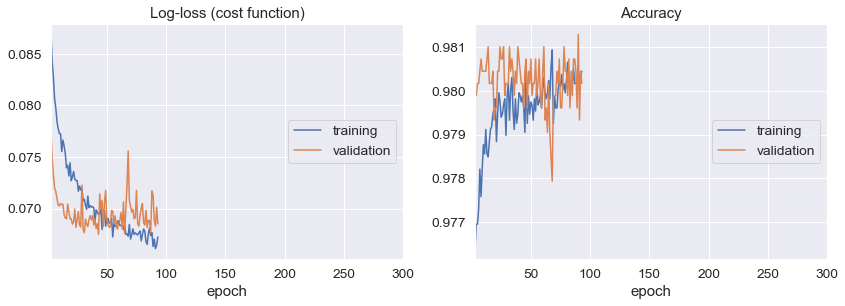

Log-loss (cost function):
training   (min:    0.066, max:    0.164, cur:    0.067)
validation (min:    0.068, max:    0.096, cur:    0.069)

Accuracy:
training   (min:    0.948, max:    0.981, cur:    0.980)
validation (min:    0.978, max:    0.981, cur:    0.980)

Epoch 00093: val_acc did not improve from 0.98128
Epoch 00093: early stopping


In [112]:
MLP2HL1DLmodel = Sequential()
MLP2HL1DLmodel.add(Dense(10, input_dim=8, activation='hard_sigmoid', kernel_initializer='normal', 
                         kernel_constraint=maxnorm(5)))
MLP2HL1DLmodel.add(Dropout(0.1))
MLP2HL1DLmodel.add(Dense(30, activation='relu', kernel_initializer='normal'))
MLP2HL1DLmodel.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
MLP2HL1DLmodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
MLP2HL1DLmodel.fit(x_train, y_train, batch_size=10, callbacks=callbacks_list, epochs=300, validation_data = (x_test, y_test))

In [113]:
MLP2HL1DLmodel = load_model('best_model_MLP2HL1DL.h5')
MLP2HL1DLmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 31        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


5-Fold Cross-Validation Accuracy Scores:  [0.97402234 0.97821229 0.97597765 0.97848561 0.98994132]


Model                                     MLP - 2 Hidden Layers and 1 Dropout Layer
Accuracy                                                                   0.981285
Precision                                                                  0.904025
Recall                                                                     0.890244
F1 Score                                                                   0.897081
False Positive Rate                                                       0.0095326
5-Fold Cross-Validation Accuracy Score                                     0.979328
dtype: object

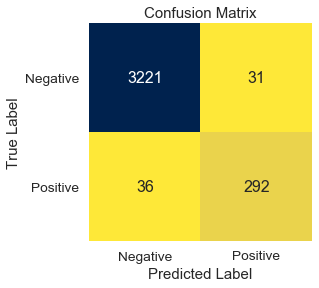

In [114]:
pipemodel = KerasClassifier(build_fn=create_model_2HL1DL, batch_size=10, epochs=50, verbose=0)
stats = Model_Eval_K('MLP - 2 Hidden Layers and 1 Dropout Layer', MLP2HL1DLmodel, x_train, y_train, x_test, y_test,
                     x, y, pipemodel)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

## Results

The final results table for the 18 different models.

In [115]:
results.style.hide_index()

Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,5-Fold Cross-Validation Accuracy Score
Logistic Regression,0.979609,0.944251,0.82622,0.881301,0.00492005,0.978266
K-Nearest Neighbors (KNN),0.980447,0.932886,0.847561,0.888179,0.00615006,0.977707
Support Vector Machine (SVM),0.980168,0.950877,0.82622,0.884176,0.00430504,0.978713
Decision Tree,0.980726,0.930233,0.853659,0.890302,0.00645756,0.978936
Random Forest,0.980726,0.919094,0.865854,0.89168,0.00768758,0.979271
Extra Trees,0.980726,0.921824,0.862805,0.891339,0.00738007,0.97888
AdaBoost,0.980447,0.935811,0.844512,0.887821,0.00584256,0.978321
Gradient Boosting,0.979888,0.923841,0.85061,0.885714,0.00707257,0.979607
Gaussian Naive Bayes,0.942737,0.638202,0.865854,0.734799,0.049508,0.944018
Bernoulli Naive Bayes,0.952514,0.687204,0.884146,0.773333,0.0405904,0.950833


This table shows the evaluation metrics (accuracy, precision, recall, F1 score, false positive rate, and 5-fold cross-validation accuracy score) for all 18 models. Some models do better in some metrics than others. The table can be sorted according to the most important metrics. This will now be done for both 5-fold cross-calibration accuracy score and recall.

### 5-Fold Cross-Validation Accuracy Score

The results table sorted by 5-Fold Cross-Validation Accuracy Score.

In [116]:
results.sort_values(by=['5-Fold Cross-Validation Accuracy Score'], ascending=False).style.hide_index()

Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,5-Fold Cross-Validation Accuracy Score
MLP - 1 Hidden Layer,0.982123,0.925806,0.875,0.899687,0.00707257,0.980166
MLP - 1 Hidden Layer and 1 Dropout Layer,0.981844,0.925566,0.871951,0.897959,0.00707257,0.98011
XGBoost,0.981006,0.924837,0.862805,0.892744,0.00707257,0.979886
Multilayer Perceptron (MLP),0.981844,0.931148,0.865854,0.897314,0.00645756,0.979718
Gradient Boosting,0.979888,0.923841,0.85061,0.885714,0.00707257,0.979607
MLP - 2 Hidden Layers,0.981006,0.933333,0.853659,0.89172,0.00615006,0.979328
MLP - 2 Hidden Layers and 1 Dropout Layer,0.981285,0.904025,0.890244,0.897081,0.0095326,0.979328
Random Forest,0.980726,0.919094,0.865854,0.89168,0.00768758,0.979271
MLP - 3 Hidden Layers,0.980726,0.911111,0.875,0.892691,0.00861009,0.979216
Decision Tree,0.980726,0.930233,0.853659,0.890302,0.00645756,0.978936


A plot of the 5-Fold Cross-Validation Accuracy Scores.

(0.94, 0.985)

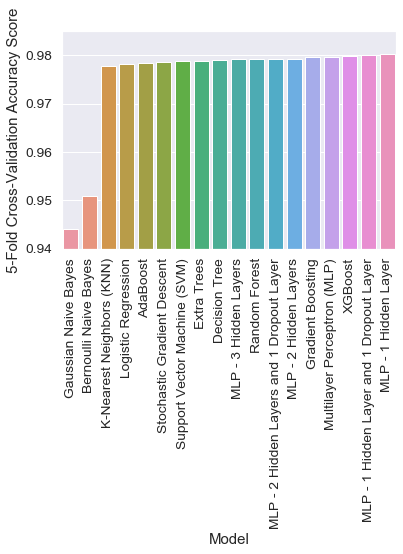

In [117]:
score = results.sort_values(by=['5-Fold Cross-Validation Accuracy Score'])
sns.barplot(x = 'Model', y = '5-Fold Cross-Validation Accuracy Score', data = score)
plt.xticks(rotation=90)
plt.ylim(0.94, 0.985)

Using 5-Fold Cross-Validation Accuracy Score as the metric, __MLP - 1 Hidden Layer__ appears to be the best model.

### Recall

Recall (what % of positive cases were caught) is also an important metric. How do these models rank based on that?

The results table sorted by Recall.

In [118]:
results.sort_values(by=['Recall'], ascending=False).style.hide_index()

Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,5-Fold Cross-Validation Accuracy Score
MLP - 2 Hidden Layers and 1 Dropout Layer,0.981285,0.904025,0.890244,0.897081,0.0095326,0.979328
Bernoulli Naive Bayes,0.952514,0.687204,0.884146,0.773333,0.0405904,0.950833
MLP - 1 Hidden Layer,0.982123,0.925806,0.875,0.899687,0.00707257,0.980166
MLP - 3 Hidden Layers,0.980726,0.911111,0.875,0.892691,0.00861009,0.979216
MLP - 1 Hidden Layer and 1 Dropout Layer,0.981844,0.925566,0.871951,0.897959,0.00707257,0.98011
Random Forest,0.980726,0.919094,0.865854,0.89168,0.00768758,0.979271
Gaussian Naive Bayes,0.942737,0.638202,0.865854,0.734799,0.049508,0.944018
Multilayer Perceptron (MLP),0.981844,0.931148,0.865854,0.897314,0.00645756,0.979718
Extra Trees,0.980726,0.921824,0.862805,0.891339,0.00738007,0.97888
XGBoost,0.981006,0.924837,0.862805,0.892744,0.00707257,0.979886


A plot of Recall.

(0.8, 0.9)

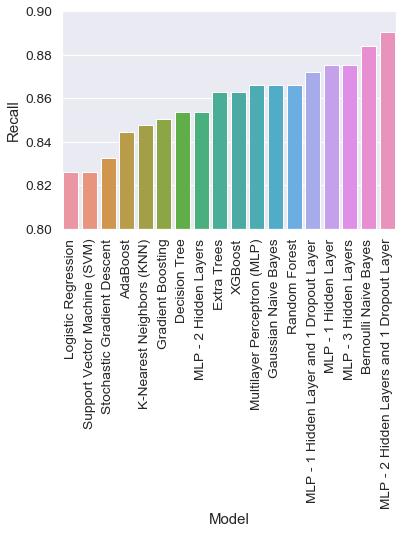

In [119]:
recalls = results.sort_values(by=['Recall'])
sns.barplot(x = 'Model', y = 'Recall', data = recalls)
plt.xticks(rotation=90)
plt.ylim(0.8, 0.9)

Using Recall as the metric, __MLP - 2 Hidden Layers and 1 Dropout Layer__ appears to be the best model.

Note that the models were tuned with accuracy score in mind. The rankings could be different if they were tuned to achieve the best recall rate instead.

### Which models performed the best with both accuracy score and recall in mind?

Plotting Recall versus 5-Fold Cross-Validation Accuracy Score.

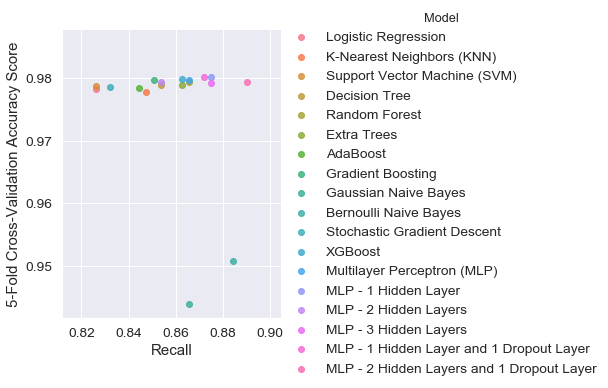

In [120]:
sns.lmplot('Recall', '5-Fold Cross-Validation Accuracy Score', hue='Model', data=results, fit_reg=False)

The upper-right corner of the plot contains the best models for this project based on recall and accuracy score. An argument could be made for either MLP - 1 Hidden Layer or MLP - 2 Hidden Layers and 1 Dropout Layer.

### Save the Best Models

For future use outside of this notebook, the best models will be 'pickled'.

Save the best model according to 5-fold cross-validation score: MLP - 1 Hidden Layer Model.

In [121]:
filename1 = 'MLP1HL_Model.sav'
pickle.dump(MLP1HLmodel, open(filename1, 'wb'))

Save the best model according to recall: MLP - 2 Hidden Layers and 1 Dropout Layer Model.

In [122]:
filename2 = 'MLP2HL1DL_Model.sav'
pickle.dump(MLP2HL1DLmodel, open(filename2, 'wb'))

## Conclusion

The best model created to classify candidates based on non-pulsar and pulsar classes was the artificial neural network multilayer perceptron with one hidden layer (MLP - 1 Hidden Layer). This is based solely on the 5-fold cross-validation accuracy scores.

When recall, the percentage of positive cases that were caught, is considered, the artificial neural network multilayer perceptron with two hidden layers and 1 dropout layer (MLP - 2 Hidden Layers and 1 Dropout Layer) performs quite well. A better recall rate could be achieved by tuning various hyperparameters to maximize this instead of accuracy score.

Further hyperparameter tuning could produce even better models. Some hyperparameters were not tuned or tuned only at a basic level. More time and resources would allow more thorough testing of promising models. Feature engineering may also yield improved modelling. Additional layers and tuning with the artificial neural networks multilayer perceptron could also potentially generate better models.